In [1]:
import pandas as pd
import numpy as np


In [6]:
import os
os.listdir("../../Datasets/project_data")

['.DS_Store',
 'hh_demographic.csv',
 'premier_league_games.xlsx',
 'premier_league_games_full.xlsx',
 'product.csv',
 'project_transactions.csv']

In [9]:
base_dir = "../../Datasets/project_data/"

In [75]:
transactions =  pd.read_csv(base_dir +"project_transactions.csv")
transactions.head()

household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   STORE_ID  RETAIL_DISC  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0     31742         0.00        1          0.0                0.0  
1     31742        -0.40        1          0.0                0.0  
2     31742         0.00        1          0.0                0.0  
3     31742        -0.99        1          0.0                0.0  
4     31742        -0.79        1          0.0                0.0

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [16]:
transactions.describe().round(2)

household_key     BASKET_ID         DAY   PRODUCT_ID    QUANTITY  \
count     2146311.00  2.146311e+06  2146311.00   2146311.00  2146311.00   
mean         1056.23  3.404897e+10      389.51   2884714.94      100.97   
std           605.01  4.723748e+09      190.05   3831949.29     1152.36   
min             1.00  2.698490e+10        1.00     25671.00        0.00   
25%           548.00  3.040798e+10      229.00    917231.00        1.00   
50%          1042.00  3.281176e+10      392.00   1027960.00        1.00   
75%          1581.00  4.012804e+10      555.00   1132771.00        1.00   
max          2099.00  4.230536e+10      711.00  18316298.00    89638.00   

       SALES_VALUE    STORE_ID  RETAIL_DISC     WEEK_NO  COUPON_DISC  \
count   2146311.00  2146311.00   2146311.00  2146311.00   2146311.00   
mean          3.11     3267.94        -0.53       56.33        -0.02   
std           4.19     9122.39         1.23       27.15         0.21   
min           0.00        1.00      -130.02        1.00       -55.93   
25%           1.29      330.00        -0.68       33.00         0.00   
50%           2.00      372.00         0.00       57.00         0.00   
75%           3.49      422.00         0.00       80.00         0.00   
max         840.00    34280.00         3.99      102.00         0.00   

       COUPON_MATCH_DISC  
count         2146311.00  
mean               -0.00  
std                 0.04  
min                -7.70  
25%                 0.00  
50%                 0.00  
75%                 0.00  
max                 0.00

In [76]:
transactions = transactions.astype({
                        'DAY' : 'Int16',
                        'QUANTITY' : 'Int32',
                        'STORE_ID' : 'Int32',
                        'WEEK_NO': 'Int16'}
                   )

In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int16  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(2), Int32(2), float64(4), int64(3)
memory usage: 147.4 MB


In [28]:
# Check for missing values
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [29]:
# Calculate unique households in dataset 
transactions['household_key'].nunique()

2099

In [30]:
# Calculate unique product_ids in dataset
transactions['PRODUCT_ID'].nunique()

84138

In [77]:
transactions.rename(columns= {
                        'BASKET_ID' : 'basket_id',
                        'DAY' : 'day',
                        'PRODUCT_ID' : 'product_id',
                        'QUANTITY' : 'quantity',
                        'SALES_VALUE' : 'sales_value',
                        'STORE_ID' : 'store_id',
                        'RETAIL_DISC' : 'retail_disc',
                        'WEEK_NO' : 'week_no',
                        'COUPON_DISC' : 'coupon_disc',
                        'COUPON_MATCH_DISC' : 'coupon_match_disc'
                        },
                        inplace = True
                   )

In [78]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                Int16  
 3   product_id         int64  
 4   quantity           Int32  
 5   sales_value        float64
 6   store_id           Int32  
 7   retail_disc        float64
 8   week_no            Int16  
 9   coupon_disc        float64
 10  coupon_match_disc  float64
dtypes: Int16(2), Int32(2), float64(4), int64(3)
memory usage: 147.4 MB


In [79]:
transactions.head()

household_key    basket_id  day  product_id  quantity  sales_value  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   store_id  retail_disc  week_no  coupon_disc  coupon_match_disc  
0     31742         0.00        1          0.0                0.0  
1     31742        -0.40        1          0.0                0.0  
2     31742         0.00        1          0.0                0.0  
3     31742        -0.99        1          0.0                0.0  
4     31742        -0.79        1          0.0                0.0

### Adding New columns
1. total_disc = retail_disc + coupon_disc
2. percentage_disc = total_disc / sales_value
3. if percentage_disc > 1 , set =1 else set = 0
4. drop the individual discount columns

In [80]:
transactions = (
                transactions
                    .assign(
                                total_discount = transactions['retail_disc'] + transactions['coupon_disc'],
                                percent_discount = (lambda x : ( x['total_discount'] / x['sales_value'] ).abs().round(2)))
                    .drop(['retail_disc','coupon_disc','coupon_match_disc'], axis = 1 )
)

                                   

In [81]:
# Use where to cap the values above 1 at 1 and below 0 at 0 . Other methods could be used here as well
transactions['percent_discount'] = ( transactions['percent_discount']
                                    .where(transactions['percent_discount'] < 1 , 1.0)
                                    
                                   )

In [82]:
# Total Sales Value
transactions['sales_value'].sum()

6666243.499999999

In [83]:
# Total Discount
transactions['total_discount'].sum()

-1178658.0799999998

In [84]:
# overall percent discount
transactions['total_discount'].sum()/ transactions['sales_value'].sum()

-0.1768099350106248

453743.0399999999

In [86]:
# Average of percent_discount
transactions['percent_discount'].mean()

0.21140600779663335

In [88]:
#Total Quantity Sold
transactions['quantity'].sum()

216713611

In [89]:
# Max quantity in single row
transactions['quantity'].max()

89638

In [154]:
# Use to grab row with max value - discount rate is lower than avergae
max_quantity_transaction = transactions.loc[transactions['quantity'].argmax()]
max_quantity_transaction

household_key               630.0
basket_id           34749153595.0
day                         503.0
product_id              6534178.0
quantity                  89638.0
sales_value                 250.0
store_id                    384.0
week_no                      73.0
total_discount             -13.45
percent_discount             0.05
Name: 1442095, dtype: Float64

In [91]:
# Sales value per transaction/basket
transactions['sales_value'].sum() /transactions['basket_id'].nunique()

28.61797938516092

In [92]:
# Sales value per household
transactions['sales_value'].sum() / transactions['household_key'].nunique()

3175.9140066698424

### **Household Analysis**
- Plot the total sales distribution purchased at the household level
- Top 10 households by quantity purchased.
- Top 10 households by sales value
- plot Total sales value for top 10 households by value, ordered from highest to lowest

<Axes: ylabel='Frequency'>

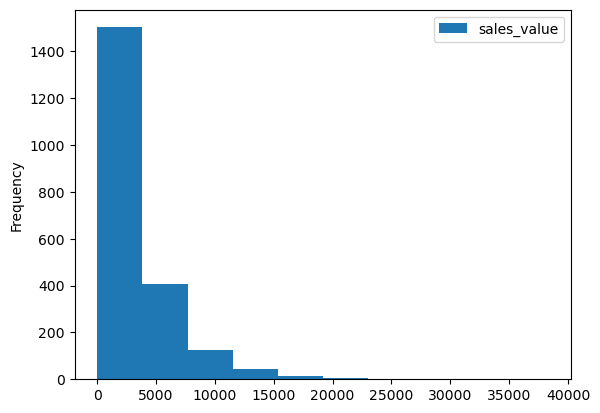

In [95]:
# Plot the distribution of household by total sales value
(transactions
 .groupby("household_key")
 .agg({ "sales_value" :'sum'})
 .plot.hist())

In [99]:
# Top 10 households by total sales value
top10_byvalue = (transactions
 .groupby("household_key")
 .agg({'sales_value' : 'sum'})
 .sort_values('sales_value', ascending = False)
 .iloc[:10])
top10_byvalue

sales_value
household_key             
1023              38319.79
1609              27859.68
1453              21661.29
1430              20352.99
718               19299.86
707               19194.42
1653              19153.75
1111              18894.72
982               18790.34
400               18494.14

In [101]:
#Top 10 househols by total quantity
top10_byquantity = (transactions
                    .groupby('household_key')
                    .agg({'quantity' : 'sum'})
                    .sort_values('quantity', ascending = False)
                    .iloc[ : 10]
                   )
top10_byquantity

quantity
household_key          
1023            4479917
755             3141769
1609            2146715
13              1863829
1430            1741892
1527            1734632
1762            1669880
707             1640193
1029            1496204
1314            1492863

In [110]:
top10_households = (transactions
 .groupby('household_key')
 .agg({ 'sales_value' : 'sum' , 'quantity' : 'sum'})
 .sort_values('sales_value', ascending = False )
 .loc[ : , 'sales_value']
 
)
top10_households

household_key
1023    38319.79
1609    27859.68
1453    21661.29
1430    20352.99
718     19299.86
          ...   
11         33.39
522        29.34
689        28.96
1897       19.58
494         8.17
Name: sales_value, Length: 2099, dtype: float64

<Axes: xlabel='household_key'>

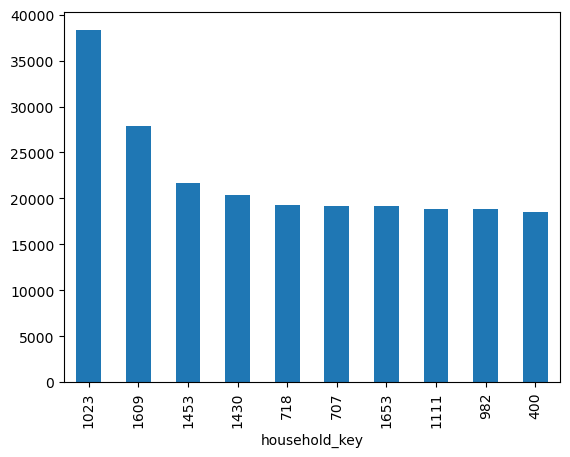

In [106]:
# Top 10 households by sales value plotted with bar plot
top10_byvalue['sales_value'].plot.bar()

### **Product Analysis**
- Product with most sales by sales value plot against horizintal bar chart
- if top selling item have higher than avergae discount rate
- top 10 productsw by sale
- Most common name for product id among rows with the households inour top 10 households by sales value
- Look up the product name of the item that had the highest quantity sold in a single row

In [111]:
transactions.head()

household_key    basket_id  day  product_id  quantity  sales_value  \
0           1364  26984896261    1      842930         1         2.19   
1           1364  26984896261    1      897044         1         2.99   
2           1364  26984896261    1      920955         1         3.09   
3           1364  26984896261    1      937406         1         2.50   
4           1364  26984896261    1      981760         1         0.60   

   store_id  week_no  total_discount  percent_discount  
0     31742        1            0.00              0.00  
1     31742        1           -0.40              0.13  
2     31742        1            0.00              0.00  
3     31742        1           -0.99              0.40  
4     31742        1           -0.79              1.00

In [120]:
# top10_products = (transactions
#                   .groupby('product_id')
#                   .agg({ 'sales_value' :'sum'})
#                   .sort_values('sales_value', ascending = False)
#                   .iloc[ : 10]
#                  )
# top10_products
#Renaming the aggregated column
top10_products = (transactions
                  .groupby('product_id')
                  .agg(total_sales_value = ('sales_value' , 'sum'))
                  .sort_values('total_sales_value', ascending = False)
                  .iloc[ : 10]
                 )
top10_products

total_sales_value
product_id                   
6534178             420154.13
6533889              42339.31
1029743              33894.75
1082185              24149.79
6533765              23831.14
6534166              23755.70
1106523              22931.01
916122               22749.02
995242               21229.72
5569230              20051.95

<Axes: ylabel='product_id'>

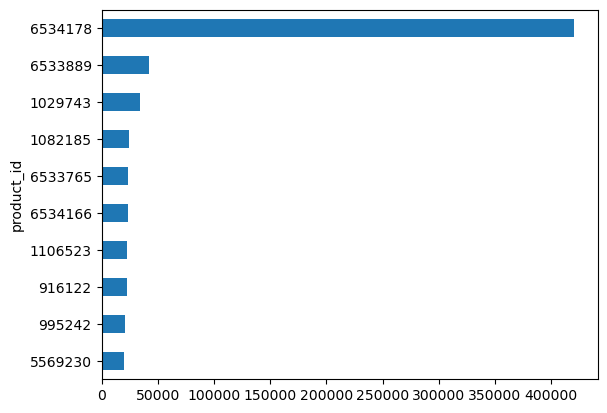

In [122]:
# plot the top 10 products by sales value
top10_products['total_sales_value'].sort_values().plot.barh()

<Axes: ylabel='product_id'>

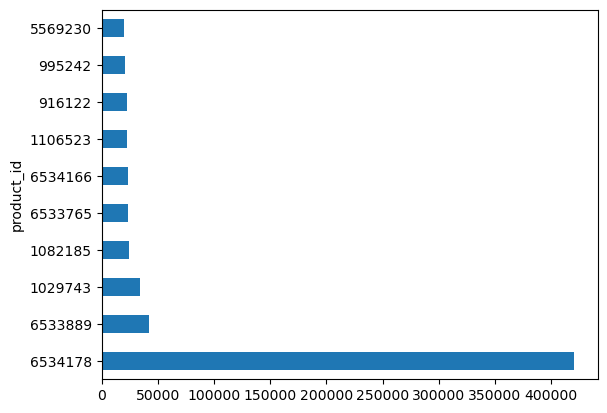

In [123]:
top10_products['total_sales_value'].plot.barh()

In [141]:
# Total discount for top 10 products
top10_discount_total = (transactions
                       # .query("product_id in @top10_products.index")
                       # .loc[ : , "total_discount"]
                       # .sum()
                      )

top10_discount_total

household_key    basket_id  day  product_id  quantity  sales_value  \
0                 1364  26984896261    1      842930         1         2.19   
1                 1364  26984896261    1      897044         1         2.99   
2                 1364  26984896261    1      920955         1         3.09   
3                 1364  26984896261    1      937406         1         2.50   
4                 1364  26984896261    1      981760         1         0.60   
...                ...          ...  ...         ...       ...          ...   
2146306           1598  42305362535  711       92130         1         0.99   
2146307           1598  42305362535  711      114102         1         8.89   
2146308           1598  42305362535  711      133449         1         6.99   
2146309           1598  42305362535  711     6923644         1         4.50   
2146310           1598  42305362535  711    14055192         1         6.99   

         store_id  week_no  total_discount  percent_discount  
0           31742        1            0.00              0.00  
1           31742        1           -0.40              0.13  
2           31742        1            0.00              0.00  
3           31742        1           -0.99              0.40  
4           31742        1           -0.79              1.00  
...           ...      ...             ...               ...  
2146306      3228      102            0.00              0.00  
2146307      3228      102            0.00              0.00  
2146308      3228      102            0.00              0.00  
2146309      3228      102           -0.49              0.11  
2146310      3228      102            0.00              0.00  

[2146311 rows x 10 columns]

In [145]:
top10_sales_total = (transactions
                     .query("product_id in @top10_products.index")
                     .loc[ : , "sales_value"]
                     .sum()
                    )
top10_sales_total

655086.5199999999

In [129]:
top10_discount_total/top10_sales_total

-0.10331267387397927

### Reading products.csv

In [131]:
os.listdir(base_dir)

['.DS_Store',
 'hh_demographic.csv',
 'premier_league_games.xlsx',
 'premier_league_games_full.xlsx',
 'product.csv',
 'project_transactions.csv']

In [132]:
products = pd.read_csv(base_dir + "product.csv")

In [135]:
products.head()

PRODUCT_ID  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ

In [148]:
products.rename( columns= {'PRODUCT_ID' : 'product_id'} , inplace = True)

In [150]:
products.head()

product_id  MANUFACTURER    DEPARTMENT     BRAND            COMMODITY_DESC  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ

In [152]:
# Top 10 producrs brought by top 10 households with max sales
top10_hh_products = transactions \
                    .query("household_key in @top10_byvalue.index") \
                    .loc[: , 'product_id'] \
                    .value_counts() \
                    .iloc[:10] \
                    # .index
top10_hh_products

product_id
1082185    576
1029743    573
6534178    561
6533889    418
1127831    230
951590     202
860776     184
1106523    178
981760     174
9677202    168
Name: count, dtype: int64

In [151]:
# Filter the products table for top 10 products by top10 households
products.query("product_id in @top10_hh_products")

product_id  MANUFACTURER       DEPARTMENT     BRAND  \
10630      860776             2          PRODUCE  National   
20973      951590           910          GROCERY  National   
24250      981760            69          GROCERY   Private   
29657     1029743            69          GROCERY   Private   
35576     1082185             2          PRODUCE  National   
38262     1106523            69          GROCERY   Private   
40600     1127831          5937          PRODUCE  National   
57181     6533889            69  MISC SALES TRAN   Private   
57221     6534178            69        KIOSK-GAS   Private   
68952     9677202            69          GROCERY   Private   

                COMMODITY_DESC      SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
10630  VEGETABLES - ALL OTHERS               CUCUMBERS                36 CT  
20973   BAKED BREAD/BUNS/ROLLS  MAINSTREAM WHITE BREAD                20 OZ  
24250                     EGGS          EGGS - X-LARGE                 1 DZ  
29657      FLUID MILK PRODUCTS   FLUID MILK WHITE ONLY                 1 GA  
35576           TROPICAL FRUIT                 BANANAS                40 LB  
38262      FLUID MILK PRODUCTS   FLUID MILK WHITE ONLY                 1 GA  
40600                  BERRIES            STRAWBERRIES                16 OZ  
57181        COUPON/MISC ITEMS   GASOLINE-REG UNLEADED                       
57221        COUPON/MISC ITEMS   GASOLINE-REG UNLEADED                       
68952             PAPER TOWELS  PAPER TOWELS & HOLDERS

In [155]:
# products with highest quantity in a single transaction
products.query(" product_id in @max_quantity_transaction")

product_id  MANUFACTURER DEPARTMENT    BRAND     COMMODITY_DESC  \
57221     6534178            69  KIOSK-GAS  Private  COUPON/MISC ITEMS   

          SUB_COMMODITY_DESC CURR_SIZE_OF_PRODUCT  
57221  GASOLINE-REG UNLEADED

In [156]:
max_quantity_transaction

household_key               630.0
basket_id           34749153595.0
day                         503.0
product_id              6534178.0
quantity                  89638.0
sales_value                 250.0
store_id                    384.0
week_no                      73.0
total_discount             -13.45
percent_discount             0.05
Name: 1442095, dtype: Float64

In [157]:
# Top 10 product names for all customers
products.query("product_id in @top10_products.index")

product_id  MANUFACTURER       DEPARTMENT     BRAND  \
16863      916122          4314             MEAT  National   
25754      995242            69          GROCERY   Private   
29657     1029743            69          GROCERY   Private   
35576     1082185             2          PRODUCE  National   
38262     1106523            69          GROCERY   Private   
53097     5569230          1208          GROCERY  National   
57171     6533765            69        KIOSK-GAS   Private   
57181     6533889            69  MISC SALES TRAN   Private   
57216     6534166            69  MISC SALES TRAN   Private   
57221     6534178            69        KIOSK-GAS   Private   

            COMMODITY_DESC              SUB_COMMODITY_DESC  \
16863              CHICKEN         CHICKEN BREAST BONELESS   
25754  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
29657  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
35576       TROPICAL FRUIT                         BANANAS   
38262  FLUID MILK PRODUCTS           FLUID MILK WHITE ONLY   
53097          SOFT DRINKS  SOFT DRINKS 12/18&15PK CAN CAR   
57171                 FUEL           GASOLINE-REG UNLEADED   
57181    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
57216    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   
57221    COUPON/MISC ITEMS           GASOLINE-REG UNLEADED   

      CURR_SIZE_OF_PRODUCT  
16863                       
25754                       
29657                 1 GA  
35576                40 LB  
38262                 1 GA  
53097                12 OZ  
57171                       
57181                       
57216                       
57221